In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from IPython.display import display
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA

C:\Users\soura\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\soura\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\soura\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\soura\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


# Reading Data

In [2]:
#REeading data
data = pd.read_csv('SoftDrink.csv',infer_datetime_format=True,parse_dates=True)

In [3]:
#Converting data to DateTime Format
data.YearMonth = pd.to_datetime(data.YearMonth,format = '%Y/%m')

In [4]:
#Changing the index of data
data.index = data.YearMonth
data.drop('YearMonth',axis=1,inplace=True)

In [5]:
data.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [6]:
data.tail()

SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

In [7]:
data.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

# Visualising Plots

In [8]:
#Plotting Complete data
px.line(data,y='SoftDrinkProduction',title='SoftDrinkProduction')

In [9]:
#Plotting mean of every year
yearMean = data.resample('Y').mean() 
px.line(yearMean,y='SoftDrinkProduction',title='Mean of sales every year')

In [10]:
#Plotting boxplot of data
px.box(data,x =data.index.year,y='SoftDrinkProduction',notched=True,title='Boxplot of every year')

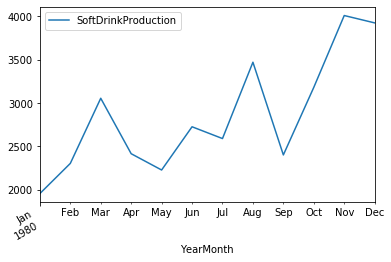

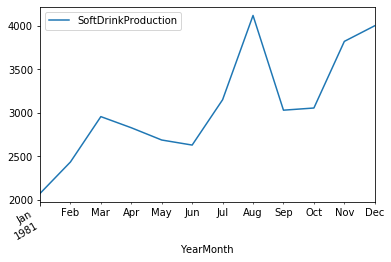

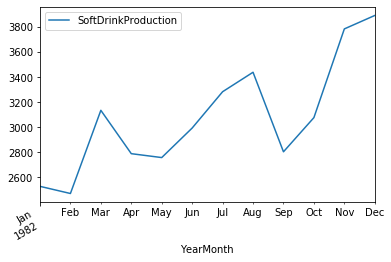

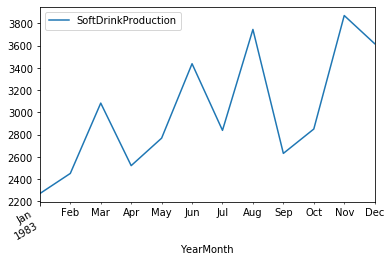

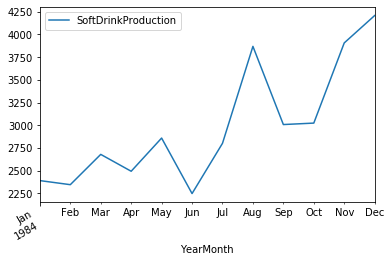

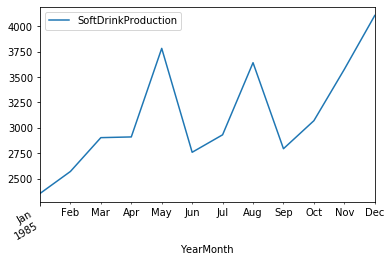

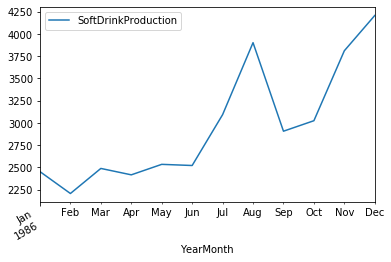

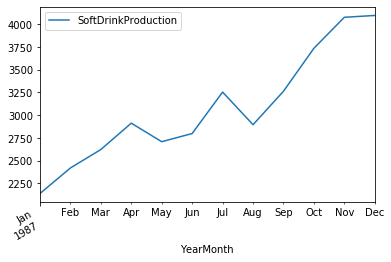

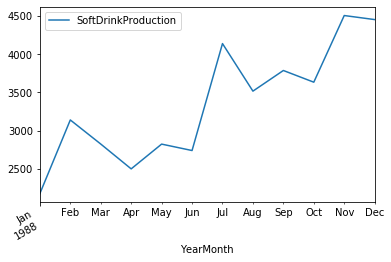

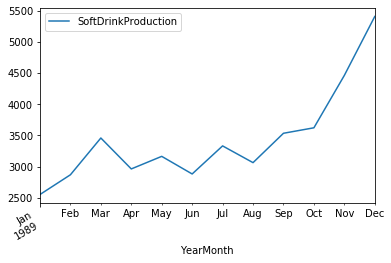

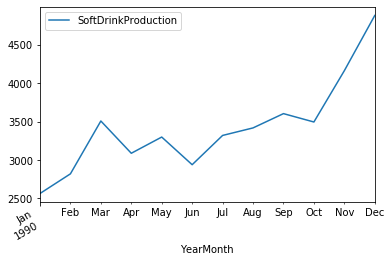

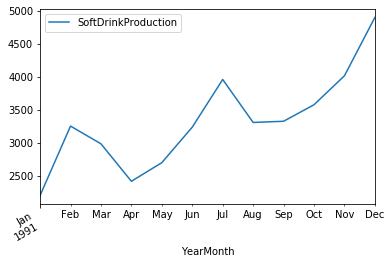

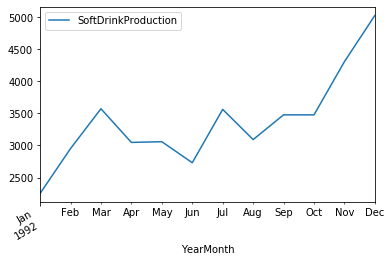

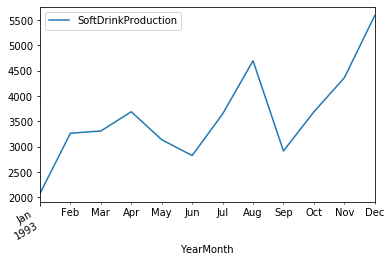

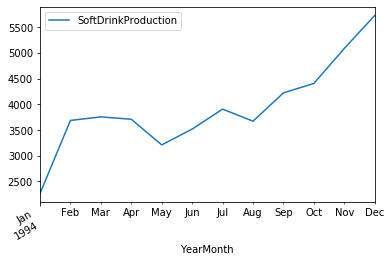

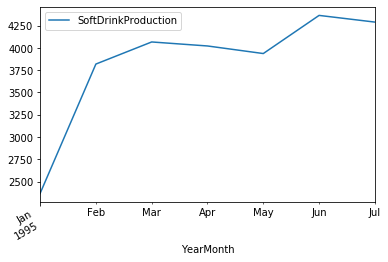

In [11]:
#Visualising sales data of every year seperately
data.groupby(data.index.year).plot(subplots=True)
plt.show()

### Decomposition

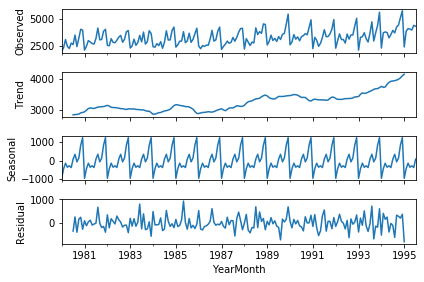

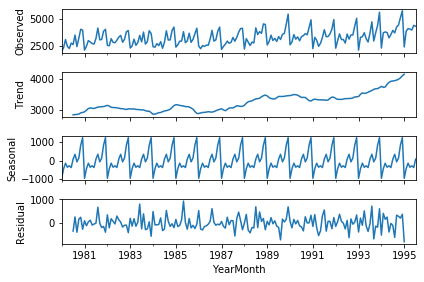

In [12]:
# Additive Decomposition
seasonal_decompose(data, model='additive').plot()

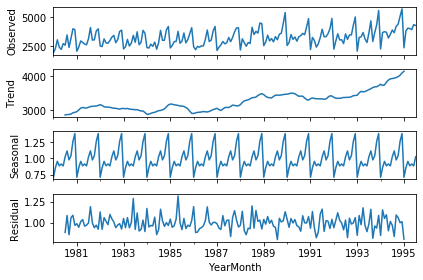

In [13]:
# Multiplicative decomposition
decomposition = seasonal_decompose(data, model='multiplicative')
decomposition.plot();


# Splitting data into training data and validation data

In [14]:
#Split data at year 1991
train = data[data.index<'1991']
test = data[data.index>='1991']

train,test = train.astype('double'),test.astype('double')

In [15]:
print('First 5 rows of the Training data')
display(train.head())
print('Last 5 rows of the training data')
display(train.tail())
print('First 5 rows of the test  data')
display(test.head())
print('Last 5 rows of the test data')
display(test.tail())

First 5 rows of the Training data


SoftDrinkProduction
YearMonth                      
1980-01-01               1954.0
1980-02-01               2302.0
1980-03-01               3054.0
1980-04-01               2414.0
1980-05-01               2226.0

Last 5 rows of the training data


SoftDrinkProduction
YearMonth                      
1990-08-01               3418.0
1990-09-01               3604.0
1990-10-01               3495.0
1990-11-01               4163.0
1990-12-01               4882.0

First 5 rows of the test  data


SoftDrinkProduction
YearMonth                      
1991-01-01               2211.0
1991-02-01               3260.0
1991-03-01               2992.0
1991-04-01               2425.0
1991-05-01               2707.0

Last 5 rows of the test data


SoftDrinkProduction
YearMonth                      
1995-03-01               4067.0
1995-04-01               4022.0
1995-05-01               3937.0
1995-06-01               4365.0
1995-07-01               4290.0

# Models

### Double Exponential Smoothning Function

In [16]:
model = Holt(train.SoftDrinkProduction,exponential=True)
mod = model.fit()

C:\Users\soura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [17]:
pred_train = mod.fittedvalues
pred_test = mod.forecast(steps = len(test))
rmse_dse = sqrt(mean_squared_error(test,pred_test))

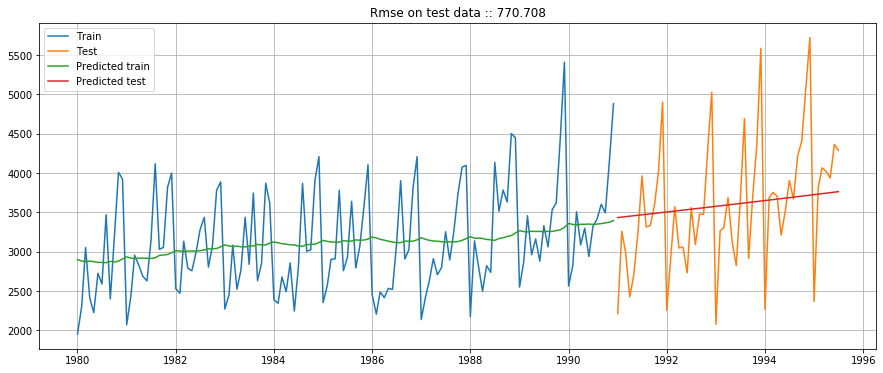

In [18]:
## Plotting on both the training and test data set
plt.figure(figsize=(15,6))
plt.title('Rmse on test data :: {}'.format('%.3f'%rmse_dse))
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(pred_train,label='Predicted train')
plt.plot(pred_test,label='Predicted test')
plt.legend(loc='best')
plt.grid();

### Triple Exponential Smoothing Model

In [19]:
model = ExponentialSmoothing(train['SoftDrinkProduction'],trend='additive',seasonal = 'multiplicative')
mod = model.fit()

C:\Users\soura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [20]:
pred_train = mod.fittedvalues
pred_test = mod.forecast(len(test))
rmse_tse = sqrt(mean_squared_error(test,pred_test))

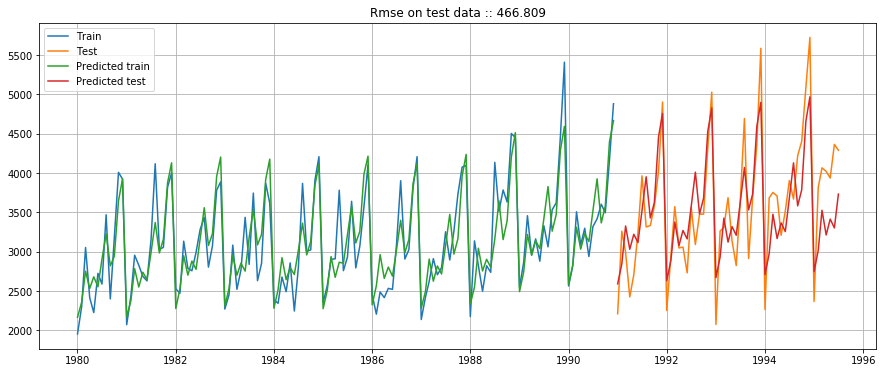

In [21]:
## Plotting on both the training and test data set
plt.figure(figsize=(15,6))
plt.title('Rmse on test data :: {}'.format('%.3f'%rmse_tse))
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(pred_train,label='Predicted train')
plt.plot(pred_test,label='Predicted test')
plt.legend(loc='best')
plt.grid();

### Moving Average Model

In [22]:
def moving_mode(dt):
    X = dt.SoftDrinkProduction
    window = 3
    history = [X[i] for i in range(window)]
    train_mem = [X[i] for i in range(window, len(X))]
    pred_mem = list()

    for t in range(len(train_mem)):
        yhat = np.mean([history[i] for i in range(len(history)-window,len(history))])
        observed = train_mem[t]
        pred_mem.append(yhat)
        history.append(observed)
    return pred_mem

def moving_test(points):
    X = points.SoftDrinkProduction
    window = 3
    history = [X[i] for i in range(window)]
    predicted = list()

    for t in range(len(test)):
        yhat = np.mean([history[i] for i in range(len(history)-window,len(history))])
        predicted.append(yhat)
        history.append(yhat)
    return predicted
    
    
pred_train = moving_mode(train)
pred_test = moving_test(train[-3:])
rmse_mem = sqrt(mean_squared_error(test, pred_test))

In [23]:
test_val = test.copy()
test_val['predicted'] = pred_test

train_val = train.copy()
train_val = train_val[3:]
train_val['predicted'] = pred_train

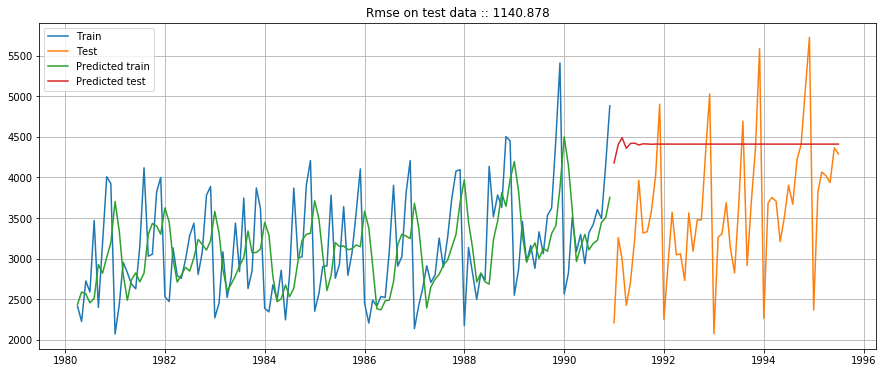

In [24]:
## Plotting on both the training and test data set
plt.figure(figsize=(15,6))
plt.title('Rmse on test data :: {}'.format('%.3f'%rmse_mem))
plt.plot(train_val.SoftDrinkProduction,label = 'Train')
plt.plot(test_val.SoftDrinkProduction,label = 'Test')
plt.plot(train_val.predicted,label='Predicted train')
plt.plot(test_val.predicted,label='Predicted test')
plt.legend(loc='best')
plt.grid();

### Auto Regression

In [25]:
model = AR(train)
mod = model.fit()

C:\Users\soura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [26]:
pred_train = mod.fittedvalues
pred_test = mod.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
rmse_ar = sqrt(mean_squared_error(test,pred_test))

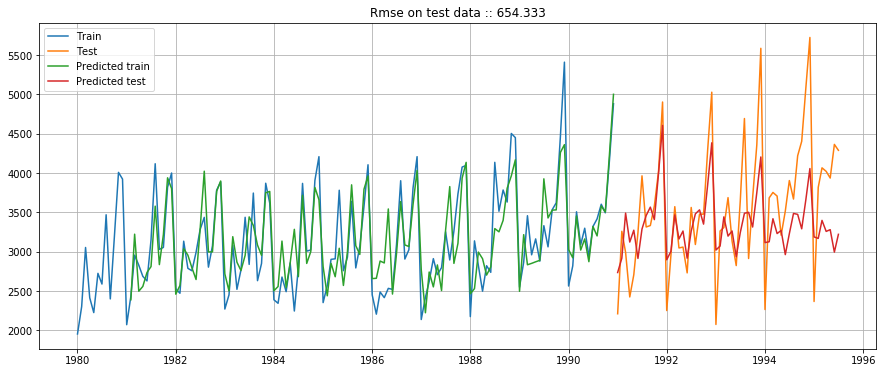

In [27]:
## Plotting on both the training and test data set
plt.figure(figsize=(15,6))
plt.title('Rmse on test data :: {}'.format('%.3f'%rmse_ar))
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(pred_train,label='Predicted train')
plt.plot(pred_test,label='Predicted test')
plt.legend(loc='best')
plt.grid();

### ARIMA

In [28]:
model = ARIMA(train,order=(1,0,0))
mod = model.fit()

pred_train = mod.fittedvalues
pred_test = mod.forecast(len(test))

test_arima = test.copy()
test_arima['predicted'] = pred_test[0]
rmse_arima = sqrt(mean_squared_error(test.SoftDrinkProduction,pred_test[0]))

C:\Users\soura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



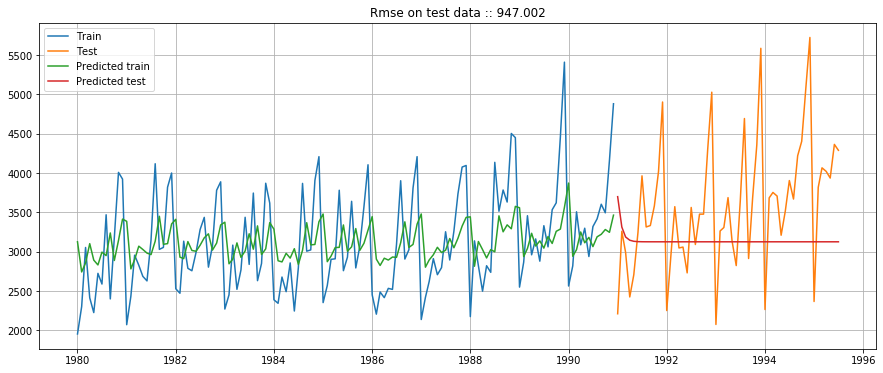

In [29]:
## Plotting on both the training and test data set
plt.figure(figsize=(15,6))
plt.title('Rmse on test data :: {}'.format('%.3f'%rmse_arima))
plt.plot(train,label = 'Train')
plt.plot(test_arima.SoftDrinkProduction,label = 'Test')
plt.plot(pred_train,label='Predicted train')
plt.plot(test_arima.predicted,label='Predicted test')
plt.legend(loc='best')
plt.grid();

## Till now Triple Exponential Smoothing model has provided best results, so we will use it for forecasting future data.

In [30]:
data = data.astype('double')

model = ExponentialSmoothing(data['SoftDrinkProduction'],trend='additive',seasonal = 'multiplicative')
mod = model.fit()

C:\Users\soura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\soura\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [31]:
future_data = mod.forecast(12)

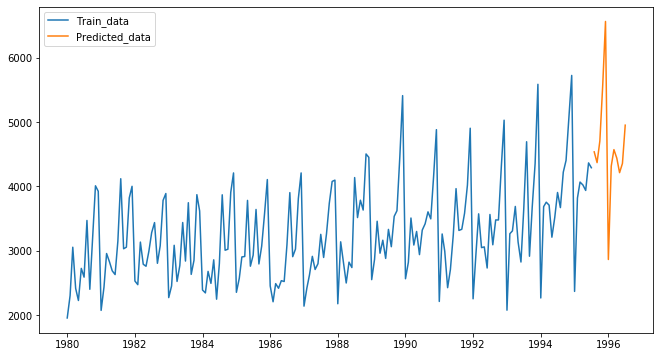

In [32]:
plt.figure(figsize=(11,6))
plt.plot(data,label='Train_data')
plt.plot(future_data,label='Predicted_data')
plt.legend(loc='best')
plt.show()